## Abstract - About the Dataset

Content
The Orange Telecom's Churn Dataset, which consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription, will be used to develop predictive models.

Each row represents a customer; each column contains customer’s attributes. The datasets have the following attributes or features:

*   State: string
*   Account length: integer
*   Area code: integer
*   International plan: string
*   Voice mail plan: string
*   Number vmail messages: integer
*   Total day minutes: double
*   Total day calls: integer
*   Total eve minutes: double
*   Total day charge: double
*   Total eve calls: integer
*   Total eve charge: double
*   Total night minutes: double
*   Total night calls: integer
*   Total night charge: double
*   Total intl minutes: double
*   Total intl calls: integer
*   Total intl charge: double
*   Customer service calls: integer
*   Churn: string

The "Churn" column is the target to predict.















## Data transforming, Feature creation, and Analysis

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


In [6]:
pip install category_encoders

In [7]:
import category_encoders as ce

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/anumohan22/ML-Data-Cleaning-and-Feature-Selection/main/churn-bigml-80.csv')

### Preliminary Data Analysis

In [9]:
# Viewing data in the file
df.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


**Checking if any column has a Null values:**

In [10]:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [11]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## Data Cleaning and Preprocessing

In [12]:
#Rename columns
df = df.rename(columns={'Account length':'Account_Length','Area code' : 'Area_Code',
                   'International plan' : 'International_Plan','Voice mail plan': 'Voice_Mail_Plan',
                   'Number vmail messages' : 'Number_Vmail_Messages',
                   'Total day minutes': 'Total_Day_Mins', 'Total day calls' : 'Total_Day_Calls',
                   'Total day charge' : 'Total_Day_Charge', 'Total eve minutes' : 'Total_Eve_Mins', 'Total eve calls' : 'Total_Eve_Calls',
                   'Total eve charge' : 'Total_Eve_Charge', 'Total night minutes' : 'Total_Night_Mins',
                   'Total night calls' : 'Total_Night_Calls', 'Total night charge' : 'Total_Night_Charge',
                   'Total intl minutes': 'Total_Intl_Mins','Total intl calls' : 'Total_Intl_Calls',
                   'Total intl charge' : 'Total_Intl_Charge', 'Customer service calls' : 'Customer_Service_Calls'})

In [13]:
df = df.drop(['Total_Day_Charge', 'Total_Eve_Charge', 'Total_Night_Charge', 'Total_Intl_Charge'], axis=1)

In [14]:
#Handling Categorical Data
df['International_Plan'] = df['International_Plan'].map({'Yes': 1, 'No': 0})
df['Voice_Mail_Plan'] = df['Voice_Mail_Plan'].map({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].map({False: 0, True: 1})

In [15]:
encoder = ce.BinaryEncoder(cols=['State'])

In [16]:
df_binary = encoder.fit_transform(df['State'])

In [17]:
df = pd.concat([df.drop('State', axis=1), df_binary], axis=1)

In [18]:
df.head(5)

,Account_Length,Area_Code,International_Plan,Voice_Mail_Plan,Number_Vmail_Messages,Total_Day_Mins,Total_Day_Calls,Total_Eve_Mins,Total_Eve_Calls,Total_Night_Mins,...,Total_Intl_Mins,Total_Intl_Calls,Customer_Service_Calls,Churn,State_0,State_1,State_2,State_3,State_4,State_5
0,128,415,0,1,25,265.1,110,197.4,99,244.7,...,10.0,3,1,0,0,0,0,0,0,1
1,107,415,0,1,26,161.6,123,195.5,103,254.4,...,13.7,3,1,0,0,0,0,0,1,0
2,137,415,0,0,0,243.4,114,121.2,110,162.6,...,12.2,5,0,0,0,0,0,0,1,1
3,84,408,1,0,0,299.4,71,61.9,88,196.9,...,6.6,7,2,0,0,0,0,0,1,0
4,75,415,1,0,0,166.7,113,148.3,122,186.9,...,10.1,3,3,0,0,0,0,1,0,0


## Correlation Analysis

- **Correlation analysis** is a statistical method used to evaluate the strength and direction of the linear relationship between two quantitative variables. - This analysis is crucial in various fields such as finance, economics, psychology, and the natural sciences, as it helps to understand how one variable may predict or relate to another.
- The outcome of a correlation analysis is usually presented as a correlation coefficient, which quantifies the degree to which the variables are related.
- **Pearson's correlation coefficients**, is used below which assume that the relationships between the variables are linear. That is, as one variable increases, the other variable tends to also increase (positive correlation) or decrease (negative correlation) in a straight-line manner.

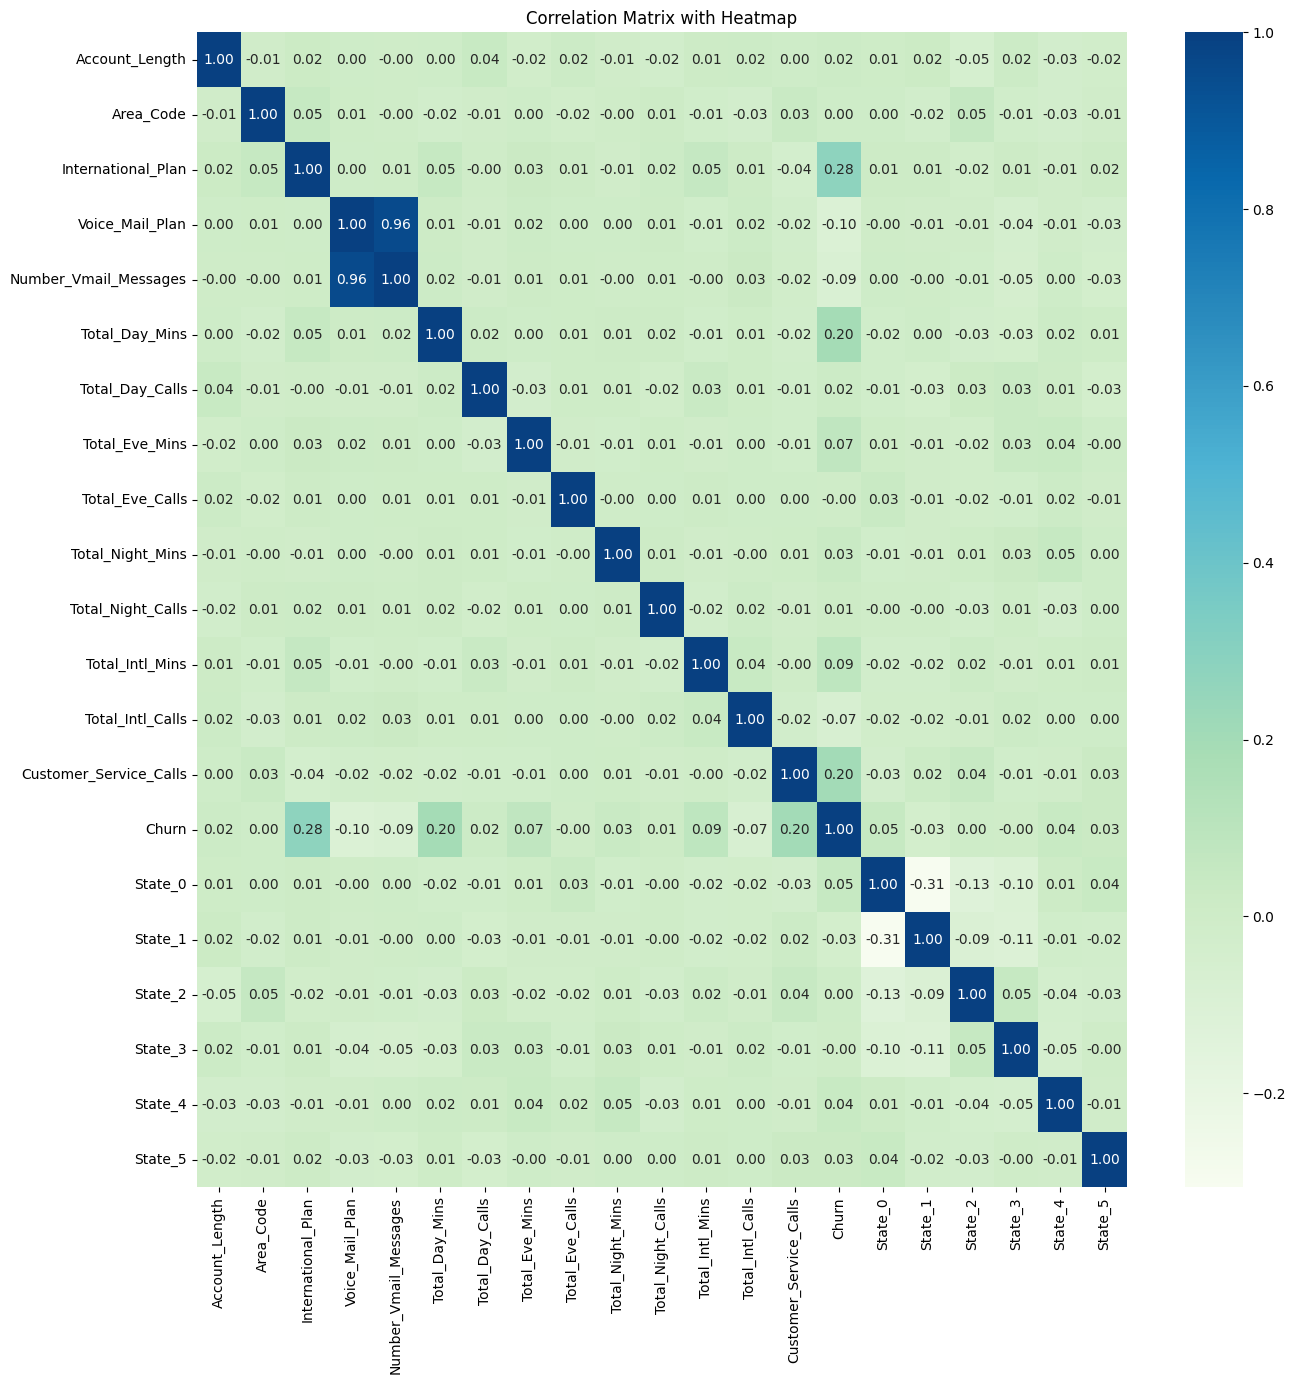

In [19]:
corr_matrix = df.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='GnBu')
plt.title('Correlation Matrix with Heatmap')
plt.show()

**Observations:**
- **High Positive Correlation**: There's a high positive correlation between Voice_Mail_Plan and Number_Vmail_Messages (0.96), which makes sense since having a voicemail plan is likely to correlate with the number of voicemail messages. Similarly, Total_Eve_Mins and Total_Eve_Calls show a perfect correlation, indicating that more calls in the evening are likely to result in more minutes spent on the phone.

- **Churn Correlation**: The target variable Churn shows a notable positive correlation with International_Plan (0.28) and Customer_Service_Calls (0.20), suggesting that these features might be good predictors for churn.

- **State Variables:** The state variables (State_0 to State_5) show a very low correlation with other features and the target, indicating that the state may not be a strong predictor in this dataset.

- **Low Correlation:** Most variables show low correlation with each other, which is generally good for a predictive model as it indicates a lack of multicollinearity.

- **Negative Correlations:** There are no strong negative correlations in this dataset, which might otherwise suggest an inverse relationship between features.

- **Interpretation:** Given the low correlation values across most variables, this dataset appears to be well-suited for building predictive models without a high risk of multicollinearity.

## Checking for Multicollinearity

**VIF Test:**
- The Variance Inflation Factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables.
- Multicollinearity is a condition where some of the independent variables are highly correlated with each other, which can undermine the statistical significance of an independent variable.



In [20]:
numeric_cols = df.select_dtypes(include=['number']).columns

# It's crucial to add a constant term for bias in the model for VIF calculation
X = add_constant(df[numeric_cols])

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                   feature         VIF
0                    const  264.406316
1           Account_Length    1.009701
2                Area_Code    1.010711
3       International_Plan    1.103395
4          Voice_Mail_Plan   12.047279
5    Number_Vmail_Messages   12.024746
6           Total_Day_Mins    1.051770
7          Total_Day_Calls    1.008590
8           Total_Eve_Mins    1.012336
9          Total_Eve_Calls    1.002756
10        Total_Night_Mins    1.005869
11       Total_Night_Calls    1.005133
12         Total_Intl_Mins    1.016627
13        Total_Intl_Calls    1.012948
14  Customer_Service_Calls    1.065566
15                   Churn    1.233639
16                 State_0    1.162165
17                 State_1    1.153402
18                 State_2    1.048528
19                 State_3    1.042657
20                 State_4    1.012869
21                 State_5    1.006843


- **Low VIF for Most Variables:** Most of the features have VIF values close to 1, indicating that they do not suffer from severe multicollinearity.
- **Voice Mail Plan and Number of Voice Mail Messages:**
  Both Voice_Mail_Plan and Number_Vmail_Messages have VIF scores slightly above 12, indicating a moderate level of multicollinearity.

  > Both Voice_Mail_Plan and Number_Vmail_Messages have VIF scores slightly above 12, indicating a moderate level of multicollinearity.
  
  > This was somewhat expected, as these features are likely related (having a voice mail plan correlates with the number of voice mail messages).







## Regularization


- Regularization is a technique used to prevent overfitting in machine learning models, particularly when you're dealing with high-dimensional data or when multicollinearity is present.
- Overfitting occurs when a model learns both the underlying pattern and the noise in the training set to such an extent that it negatively impacts the performance of the model on new, unseen data.

Lasso Regularization

Lasso Regression (L1 Regularization):
- Adds a penalty equal to the absolute value of the magnitude of coefficients.
- This can lead to coefficients being shrunk to exactly zero, which is a form of feature selection.
- The penalty term is the sum of the absolute values of the feature weights, multiplied by the regularization strength parameter λ.

In [21]:
X = df.drop(['Churn'], axis=1)  # Drop 'const' column and target variable
y = df['Churn']


In [22]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the LassoCV model
lasso = LassoCV(cv=5, random_state=42).fit(X_train, y_train)

print("Lasso ")
# Coefficients
print("Coefficients:", lasso.coef_)

from sklearn.metrics import mean_squared_error

# Assuming `X_test` is your test set features and `y_test` is the actual outcomes
y_pred = lasso.predict(X_test)  # `lasso_model` is your fitted Lasso model

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error for Lasso:", mse)

# Best alpha (regularization strength)
print("Best alpha:", lasso.alpha_)

Lasso 
Coefficients: [ 1.22182298e-04 -1.88723210e-04  2.88420189e-01 -0.00000000e+00
 -2.44608296e-03  1.33596303e-03  3.80886975e-04  4.65469143e-04
  6.20363095e-05  2.17136956e-04 -1.60267035e-04  9.90720698e-03
 -9.14723534e-03  5.10487807e-02  9.71461433e-03 -3.67824233e-03
  0.00000000e+00 -0.00000000e+00  2.05223160e-02  0.00000000e+00]
Mean Squared Error for Lasso: 0.1079419464102911
Best alpha: 0.004035344337513948


Ridge Regularization

Ridge Regression (L2 Regularization):
- Adds a penalty equal to the square of the magnitude of coefficients.
- All coefficients are shrunk by the same factor (none are eliminated).
- The penalty term is the sum of the squares of all the feature weights, multiplied by the regularization strength parameter λ.

In [23]:
X = df.drop('Churn', axis=1)
y = df['Churn']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the Ridge model
# Note: Adjust alpha as needed for regularization strength
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predict on the test set
y_pred = ridge_model.predict(X_test)

# Evaluate the model
print("Ridge")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Coefficients
print("Ridge Coefficients:")
coefficients = pd.DataFrame(ridge_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

Ridge
Mean Squared Error: 0.10786938054849773
Ridge Coefficients:
                        Coefficient
Account_Length             0.005401
Area_Code                 -0.008316
International_Plan         0.100512
Voice_Mail_Plan           -0.055724
Number_Vmail_Messages      0.019998
Total_Day_Mins             0.071479
Total_Day_Calls            0.008441
Total_Eve_Mins             0.023756
Total_Eve_Calls            0.001005
Total_Night_Mins           0.010945
Total_Night_Calls         -0.002735
Total_Intl_Mins            0.027411
Total_Intl_Calls          -0.024993
Customer_Service_Calls     0.070430
State_0                    0.009986
State_1                   -0.008991
State_2                    0.001769
State_3                   -0.002923
State_4                    0.017915
State_5                    0.007419


Comparison between Lasso and Ridge Regression:

Mean Squared Error (MSE):

Ridge: 0.10786938054849773
Lasso: 0.1079419464102911
The MSE is very close between the two models, with Ridge having a slightly lower MSE. A lower MSE indicates the model's predictions are closer to the actual values, suggesting that the Ridge model performs marginally better in terms of prediction error.

Coefficient Magnitudes:

The Ridge regression retains all features in the model, with coefficients ranging from -0.055724 to 0.100512.
Lasso regression has set several coefficients to exactly zero, indicating feature selection. This is a property of Lasso that can be beneficial if there's a belief that many features are irrelevant or if model interpretability is a priority.

Best Alpha:

Lasso reports a best alpha (regularization strength) of 0.004035344337513948. This is the hyperparameter that gave the lowest cross-validated error during the Lasso fitting process. Ridge regression does not report an alpha, which may indicate it wasn't tuned in the same way.

Interpretability:

Lasso may be preferable if you want a more interpretable model (fewer features to consider), as it performs implicit feature selection.
Ridge may be preferable if you believe all features contribute to the prediction and want to keep them all, albeit with penalized coefficients.

Feature Selection:

If certain features are known to be crucial based on domain knowledge, the zeroing effect of Lasso could be a disadvantage. Ridge's method of shrinking coefficients may be more appropriate in such cases.
Predictive Performance:

Although the MSE of Ridge is slightly better, the difference is minimal. It is important to validate these findings with additional metrics such as R-squared, and by evaluating the models on a separate validation dataset or through cross-validation.
In summary, if the primary goal is prediction accuracy, Ridge is marginally better according to MSE. However, if model simplicity and feature selection are more important, Lasso might be the preferred choice due to its ability to reduce the number of features. Additional validation and consideration of the specific use case are recommended before finalizing the model choice.

## Installing H20 model


H2O's AutoML (Automated Machine Learning) is an automated machine learning platform that aims to automate the process of building a well-tuned machine learning model.

In [24]:
#Installing required packages

!pip3 install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=3bc92482cc704f11f6cd05f5a058bdbfedc465a76789eab54137f01762f3df87
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [25]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpda52jdr5
  JVM stdout: /tmp/tmpda52jdr5/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpda52jdr5/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,08 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_tskxt9
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


## Data Preparation - Load the Dataset on H20frame




In [26]:
h2o_df = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [27]:
h2o_df.head()

Account_Length,Area_Code,International_Plan,Voice_Mail_Plan,Number_Vmail_Messages,Total_Day_Mins,Total_Day_Calls,Total_Eve_Mins,Total_Eve_Calls,Total_Night_Mins,Total_Night_Calls,Total_Intl_Mins,Total_Intl_Calls,Customer_Service_Calls,Churn,State_0,State_1,State_2,State_3,State_4,State_5
128,415,0,1,25,265.1,110,197.4,99,244.7,91,10,3,1,0,0,0,0,0,0,1
107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0,0,0,0,0,1,0
137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0,0,0,0,0,1,1
84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0,0,0,0,0,1,0
75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0,0,0,0,1,0,0
118,510,1,0,0,223.4,98,220.6,101,203.9,118,6.3,6,0,0,0,0,0,1,0,1
121,510,0,1,24,218.2,88,348.5,108,212.6,118,7.5,7,3,0,0,0,0,1,1,0
147,415,1,0,0,157,79,103.1,94,211.8,96,7.1,6,0,0,0,0,0,1,1,1
141,415,1,1,37,258.6,84,222,111,326.4,97,11.2,5,0,0,0,0,1,0,0,0
74,415,0,0,0,187.7,127,163.4,148,196,94,9.1,5,0,0,0,0,1,0,0,1


In [28]:
target = 'Churn'  # target column
predictors = h2o_df.columns
predictors.remove(target)  # Remove the target variable from predictors

# Convert target variable to factor if it's a classification problem
h2o_df[target] = h2o_df[target].asfactor()


In [29]:
train, test = h2o_df.split_frame(ratios=[.8], seed=1234)

Model Selection and Training:
AutoML automatically trains and tunes many models, including, but not limited to:

- Generalized Linear Models (GLM)
- Random Forests (RF)
- Gradient Boosting Machines (GBM)
- Deep Learning (Neural Networks)
- Stacked Ensembles

Knowing the terms:
- MSE (Mean Squared Error):

It measures the average squared difference between the actual and predicted values. The formula is: MSE = (1/n) * Σ(actual - prediction)², where n is the number of observations.
A lower MSE indicates a better fit of the model to the data.

- RMSE (Root Mean Squared Error):

It is the square root of MSE and serves the same purpose but is on the same scale as the original data.
RMSE is more sensitive to outliers than MSE and is commonly used because it is interpretable in the same units as the response variable.

- LogLoss (Logarithmic Loss):

Used for evaluating the performance of a classification model where the prediction is a probability value between 0 and 1. The formula is: LogLoss = -(1/n) * Σ(y * log(p) + (1 - y) * log(1 - p)), where y is the binary true label and p is the predicted probability.
A lower LogLoss is better, with 0 representing a perfect log loss.

- AUC (Area Under Curve):

This metric is used with the ROC (Receiver Operating Characteristic) curve and measures the two-dimensional area underneath the entire ROC curve from (0,0) to (1,1).
AUC ranges from 0 to 1, with a higher value indicating better model performance. An AUC of 0.5 suggests no discrimination (i.e., random chance), while an AUC of 1 indicates perfect classification.

- Confusion Matrix:

A table used to describe the performance of a classification model on a set of test data for which the true values are known. It compares the actual target values with those predicted by the machine learning model.
The matrix gives insight into the types of errors being made by a classifier and includes terms such as true positives, false positives, true negatives, and false negatives.

In [59]:
aml = H2OAutoML(max_models=10, seed=1, balance_classes=True)
aml.train(x=predictors, y=target, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_4_AutoML_2_20240220_43027


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    51                 51                          92556                  10           10           10            87            172           139.765

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.013789576850149863
RMSE: 0.11742902899262117
LogLoss: 0.07423410533077347
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.46641886109118635
       0     1     Error    Rate
-----  ----  ----  -------  ------------
0      1844  0     0        (0.0/1844.0)
1      0     1845  0        (0.0/1845.0)
Total  1844  1845  0        (0.0/3689.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.466419     1         246
max f2                       0.466419     1         246
max f0point5                 0.466419     1         246
max accuracy                 0.466419     1         246
max precision                0.965659     1         0
max recall                   0.466419     1         246
max specificity              0.965659     1         0
max absolute_mcc             0.466419     1         246
max min_per_class_accuracy   0.466419     1         246
max mean_per_class_accuracy  0.466419     1         246
max tns                      0.965659     1844      0
max fns                      0.965659     1839      0
max fps                      0.000713499  1844      399
max tps                      0.466419     1845      246
max tnr                      0.965659     1         0
max fnr                      0.965659     0.996748  0
max fpr                      0.000713499  1         399
max tpr                      0.466419     1         246

Gains/Lift Table: Avg response rate: 50.01 %, avg score: 43.98 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.0113852                   0.955782           1.99946  1.99946            1                0.960296    1                           0.960296            0.0227642       0.0227642                  99.9458  99.9458            0.0227642
2        0.0211439                   0.952775           1.99946  1.99946            1                0.953511    1                           0.957165            0.0195122       0.0422764                  99.9458  99.9458            0.0422764
3        0.0309027                   0.950429           1.99946  1.99946            1                0.951432    1                           0.955354            0.0195122       0.0617886                  99.9458  99.9458            0.0617886
4        0.0406614                   0.948339           1.99946  1.99946            1                0.94899     1                           0.953827            0.0195122       0.0813008                  99.9458  99.9458            0.0813008
5        0.0504202                   0.946204           1.99946  1.99946            1                0.947261    1                           0.952556            0.0195122       0.100813                   99.9458  99.9

1. Model Details:
- Model Key: Unique identifier for the model within H2O.
- Number of Trees: The model used 51 trees.
- Depth: All trees have a depth of 10, indicating the number of splits from root to leaf.
- Leaves: The model has between 87 to 172 leaves across different trees, with an average of around 139.76471 leaves per tree, which indicates the complexity of the model.
2. Model Performance on Training Data:
- MSE (Mean Squared Error): Low MSE of 0.013789576850149863 indicates a good fit.
- RMSE (Root Mean Squared Error): Similarly, a low RMSE value.
- LogLoss: Logarithmic loss of 0.07423410533077347, lower is better.
- AUC (Area Under Curve): Perfect score of 1.0 suggests the model perfectly distinguishes between the classes.
- Confusion Matrix: Shows that the model perfectly classified all instances in the training data (no false positives or negatives).
3. Cross-Validation Metrics:
- AUC: 0.9253968645237626, which is excellent but not perfect as in the training set, indicating some overfitting.
- MSE, RMSE, LogLoss: These are higher than in the training set, as expected, but still indicate good model performance.
- Confusion Matrix for Cross-Validation: Shows some errors, contrasting with the perfect training performance, further indicating overfitting to the training data.
Variable Importances:
4. Lists the features used by the model ranked by their importance:
- Total_Day_Mins and Customer_Service_Calls are among the most important features, suggesting they are strong predictors of churn.
- State features (encoded into numerical variables) and Voice_Mail_Plan have lower importance, suggesting they have less predictive power.


**Leaderboard:** A Leaderboard is presented, ranking all models according to their performance on the given dataset.

In [31]:
# View the leaderboard
lb = aml.leaderboard
print(lb)


model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse        mse
GBM_4_AutoML_1_20240220_41354                           0.925397   0.221932  0.851636                0.113661  0.237453  0.056384
StackedEnsemble_BestOfFamily_1_AutoML_1_20240220_41354  0.924482   0.171868  0.853069                0.11826   0.207361  0.0429984
StackedEnsemble_AllModels_1_AutoML_1_20240220_41354     0.921814   0.1704    0.85339                 0.110685  0.205394  0.0421866
GBM_1_AutoML_1_20240220_41354                           0.92133    0.205425  0.847222                0.119623  0.233705  0.0546183
GBM_3_AutoML_1_20240220_41354                           0.921266   0.2096    0.847057                0.117179  0.229158  0.0525135
GBM_2_AutoML_1_20240220_41354                           0.916956   0.20629   0.848833                0.11096   0.230932  0.0533295
XGBoost_3_AutoML_1_20240220_41354                       0.914178   0.203381  0.82728

**Model Performance Metrics**:
- AUC (Area Under the ROC Curve): Measures the ability of the model to distinguish between the classes. The higher, the better, with 1 being perfect.
- LogLoss (Logarithmic Loss): A lower LogLoss indicates better predictions. It penalizes confident but wrong predictions more.
- AUCPR (Area Under the Precision-Recall Curve): Important in imbalanced datasets, higher values are better.
- Mean Per-Class Error: Averages the error rate across all classes. Lower values indicate better performance.
- RMSE (Root Mean Square Error) and MSE (Mean Squared Error): Measure the model's prediction error. Lower values are better.

**Insights from the Leaderboard:**
1. GBM Models: The GBM_4_AutoML_3_20240217_204014 model leads the pack with the highest AUC, indicating strong predictive performance.
2. Stacked Ensembles: These models combine predictions from multiple models. StackedEnsemble_BestOfFamily_1_AutoML_3_20240217_204014 and StackedEnsemble_AllModels_1_AutoML_3_20240217_204014 show very competitive performance, with slight advantages in LogLoss and AUCPR, suggesting good reliability and precision in predictions, especially in potentially imbalanced scenarios.
3. XGBoost Models: Slightly lower in ranking but still competitive, indicating that the ensemble methods slightly outperform them.
4. DRF and XRT Models: These models exhibit lower performance than GBM and XGBoost models, as indicated by their AUC and LogLoss metrics, but they can offer benefits in interpretability and handling categorical variables.

In [32]:
# Evaluating top model on the test set
perf = aml.leader.model_performance(test)
print(perf)

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.052235640199775515
RMSE: 0.22855117632551253
LogLoss: 0.2256279730057662
Mean Per-Class Error: 0.10855414746543779
AUC: 0.9042482718894009
AUCPR: 0.8760646963533415
Gini: 0.8084965437788019

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.24209297762441379
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      432  2    0.0046   (2.0/434.0)
1      17   63   0.2125   (17.0/80.0)
Total  449  65   0.037    (19.0/514.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.242093     0.868966  64
max f2                       0.0827876    0.85      79
max f0point5                 0.242093     0.926471  64
max accuracy                 0.242093     0.963035  64
max precision                0.970606     1         0
max recall                   0.0014

**Variance Importance of each variable**


In [33]:
best_model = aml.leader

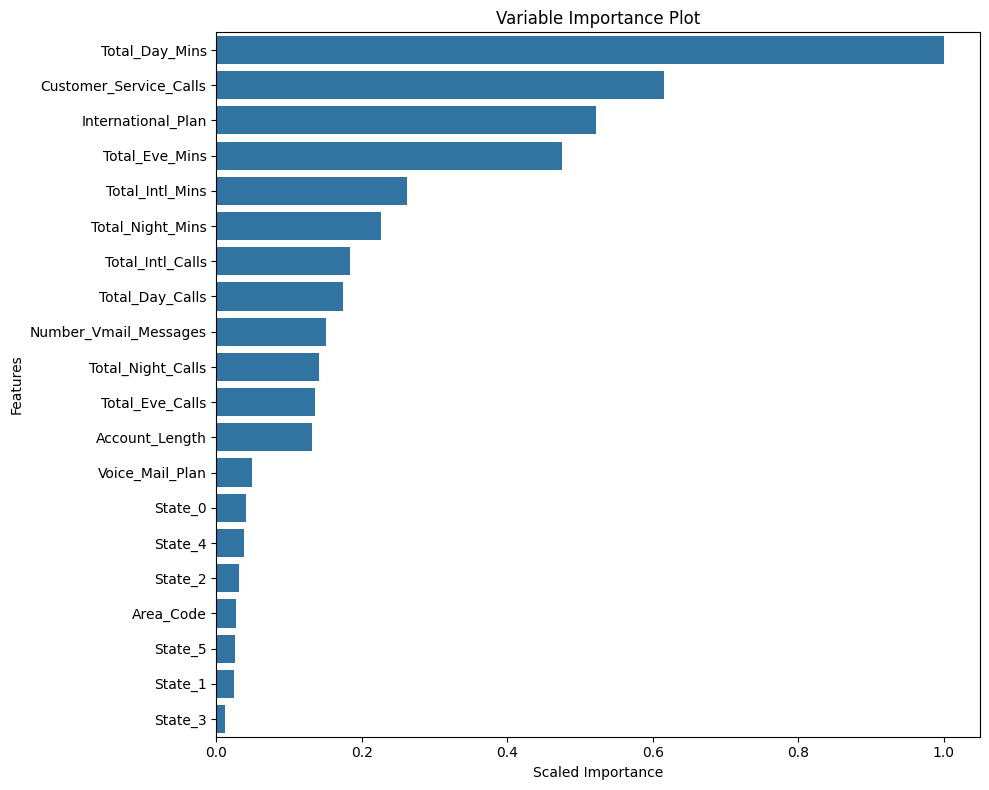

In [34]:
if hasattr(best_model, 'varimp'):
    var_imp_df = best_model.varimp(use_pandas=True)

    plt.figure(figsize=(10, 8))
    sns.barplot(x="scaled_importance", y="variable", data=var_imp_df)
    plt.title('Variable Importance Plot')
    plt.xlabel('Scaled Importance')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()
else:
    print("The best model does not support variable importance.")

**Top Performing Model:**
- The *GBM_4_AutoML_3_20240217_204014* model shows the highest AUC on your list, suggesting it's very effective at distinguishing between the churn and non-churn classes.
- Stacked Ensembles: These models combine predictions from several models and generally perform well, as indicated by their AUC and AUCPR scores.
- GBM Model Performance on Test Data
The model metrics reported on test data give insight into how well the model generalizes to unseen data.

AUC and AUCPR: With an AUC of 0.9042482718894009 and AUCPR of 0.8760646963533415, the GBM model demonstrates strong predictive power and reliability in identifying the positive class in an imbalanced dataset.
Error Rates and Confusion Matrix: The confusion matrix and derived metrics like error rates provide a more nuanced view of model performance across different thresholds. The F1 threshold selected (0.24209297762441379) balances precision and recall effectively, leading to high accuracy and low overall error rate on the test data.

### **Addressing Assignment Questions:**
**1. Is the relationship significant?**

> Yes, the significant AUC of 0.9253968645237626 indicates a strong relationship between the predictor variables and the target outcome.

**2. Are any model assumptions violated?**

> Tree-based models like GBMs don't assume linear relationships or feature independence, making them versatile for various data distributions and interactions.

**3. Is there any multicollinearity in the model?**

> While GBMs are less sensitive to multicollinearity, the initial VIF analysis helps ensure that the predictive power of the model isn't compromised by highly correlated predictors.

**4. In the multivariate models are predictor variables independent of all the other predictor variables?**

> No, GBMs consider interactions between variables through the tree-building process, so predictor variables do not need to be independent.

**5.  In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**

> The most significant variables are Total_Day_Mins, Customer_Service_Calls, International_Plan, and Total_Eve_Mins, based on their relative importance. **Further interpretation can be derived from examining partial dependence plots and SHAP values through H2O's interpretability interface.**

**6. Does the model make sense?**

> Yes, the model makes sense as evidenced by strong performance metrics (AUC, AUCPR, low error rates), indicating it has learned meaningful patterns from the data.

**7. Does regularization help?**

> The MSE values for Lasso (0.1079419464102911) and Ridge (0.10786938054849773) are quite close, suggesting that both regularization techniques effectively reduced overfitting while maintaining model accuracy.Not directly applicable to GBMs in the same way as linear models, but GBMs control overfitting through parameters like tree depth, learning rate, and the number of trees. Stacked Ensembles inherently leverage model diversity to generalize better.

**8. Which independent variables are significant?**


> Significant independent variables include Total_Day_Mins, Customer_Service_Calls, International_Plan, and Total_Eve_Mins, as indicated by their scaled importance.



**9.  Which hyperparameters are important?**

> Important hyperparameters for GBMs typically include the number of trees, max depth, learning rate, and subsampling rate. AutoML's optimization process aims to find the best combination of these for the given dataset.



# Model Correlation Heatmap

This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering).

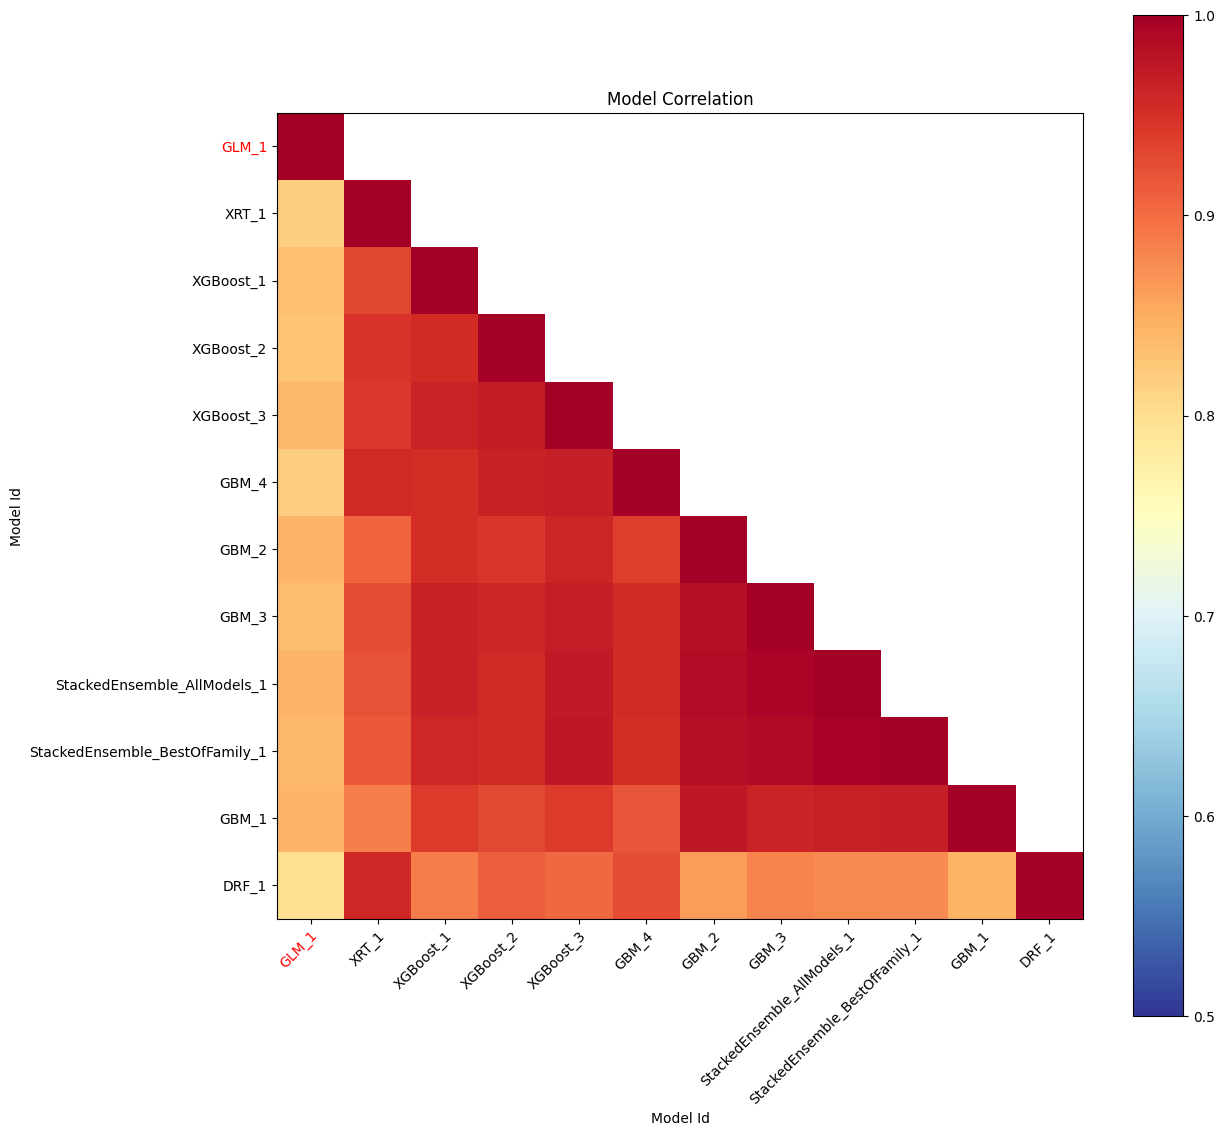

In [35]:
mc_plot = aml.model_correlation_heatmap(test)

- Highly correlated models (red squares, closer to 1) may have similar underlying algorithms or feature interpretations, making similar predictions.
- Models that are less correlated (blue squares, closer to 0) make different predictions and may capture different patterns in the data.

# Partial Dependence Plots

Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

Partial dependence plots can be created for individual variables to understand their effect on the prediction.

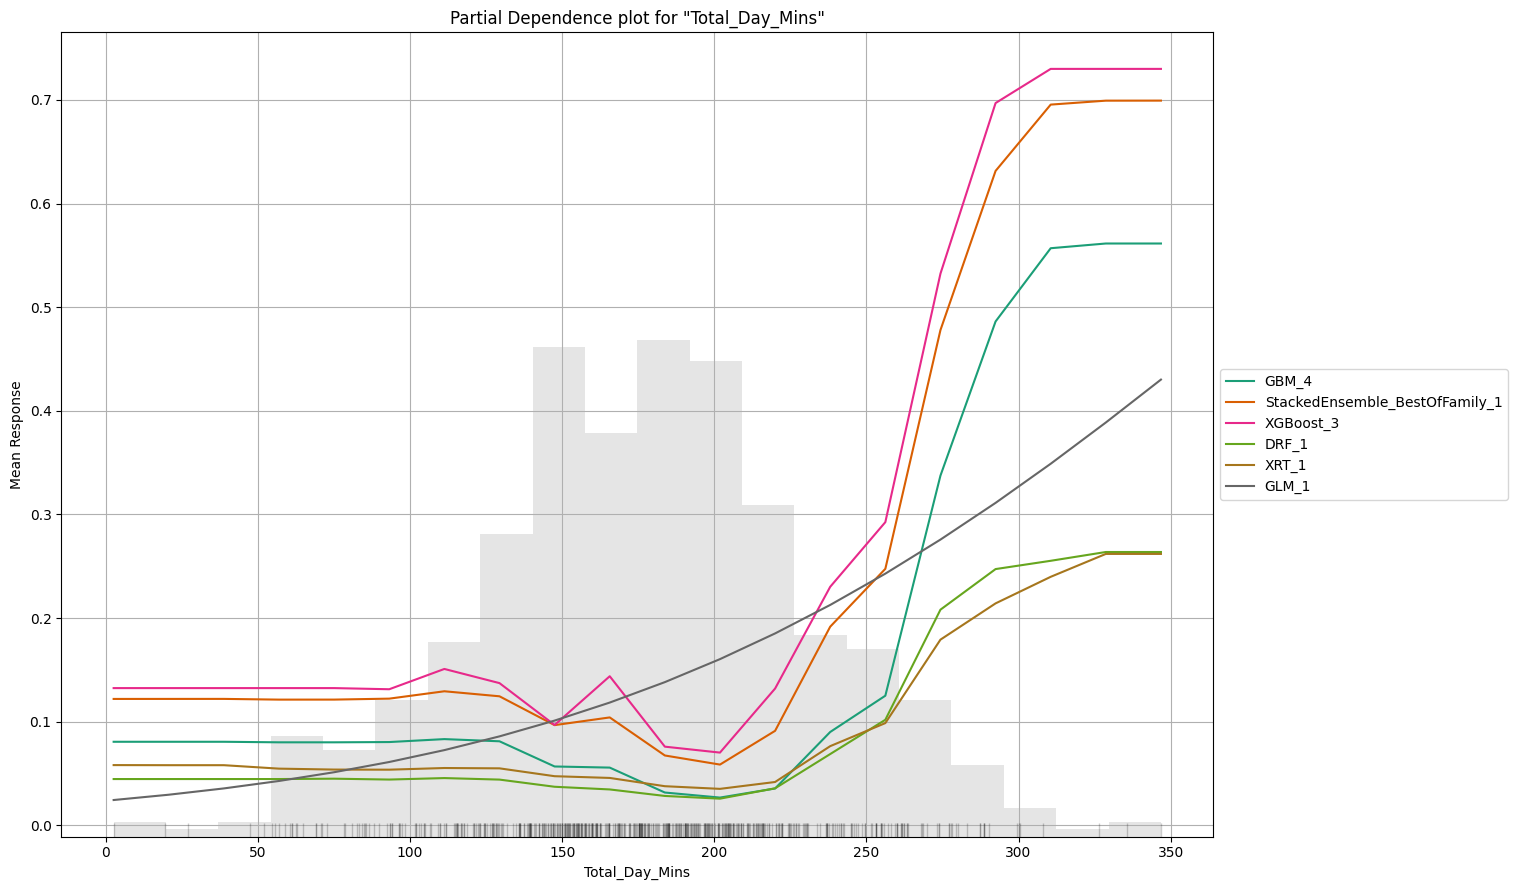

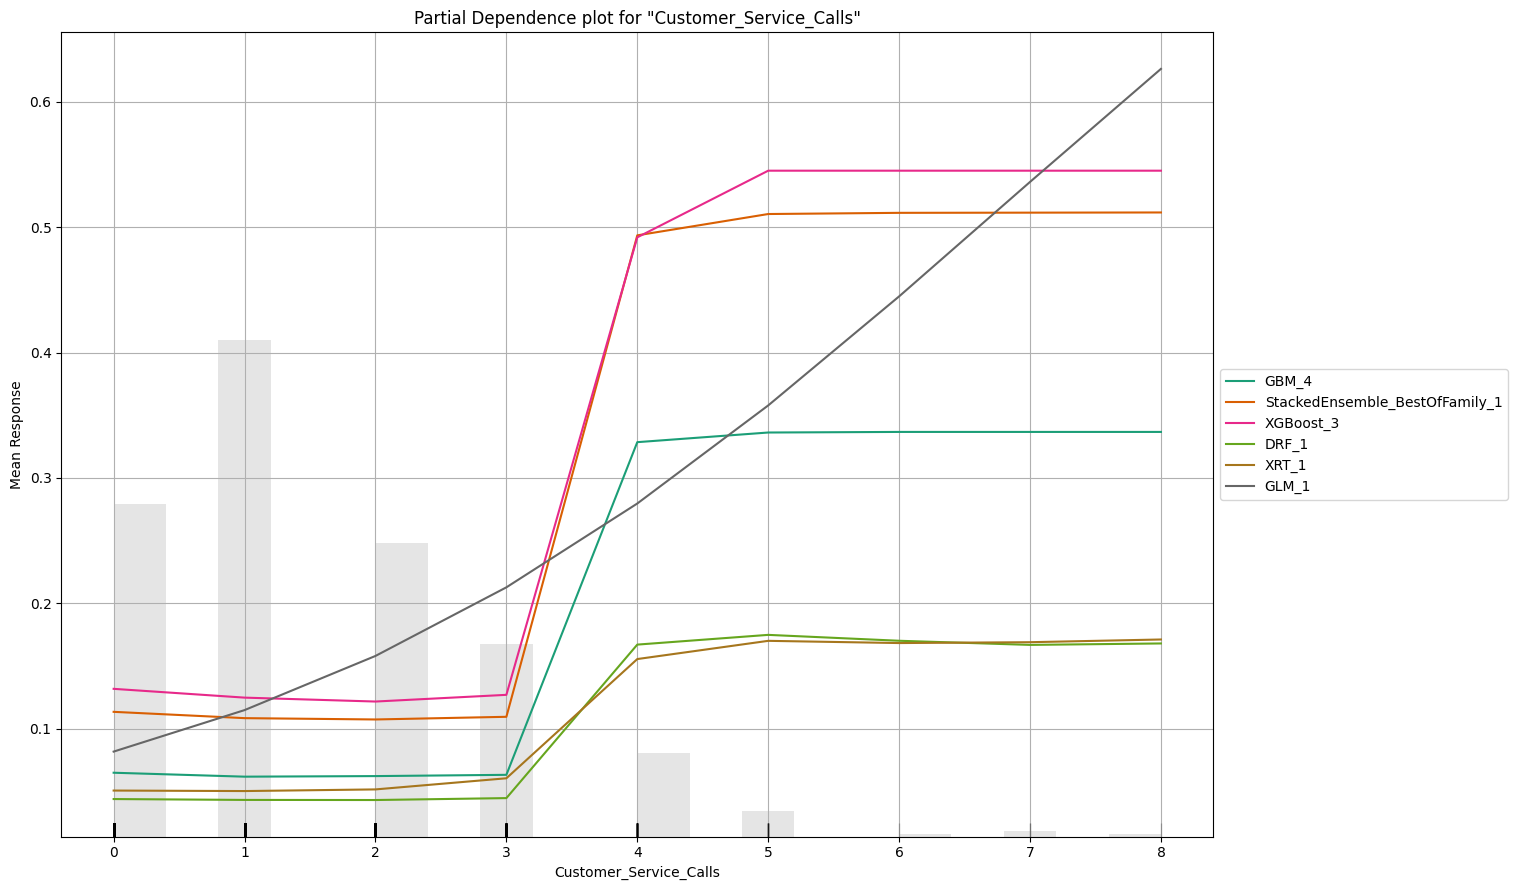

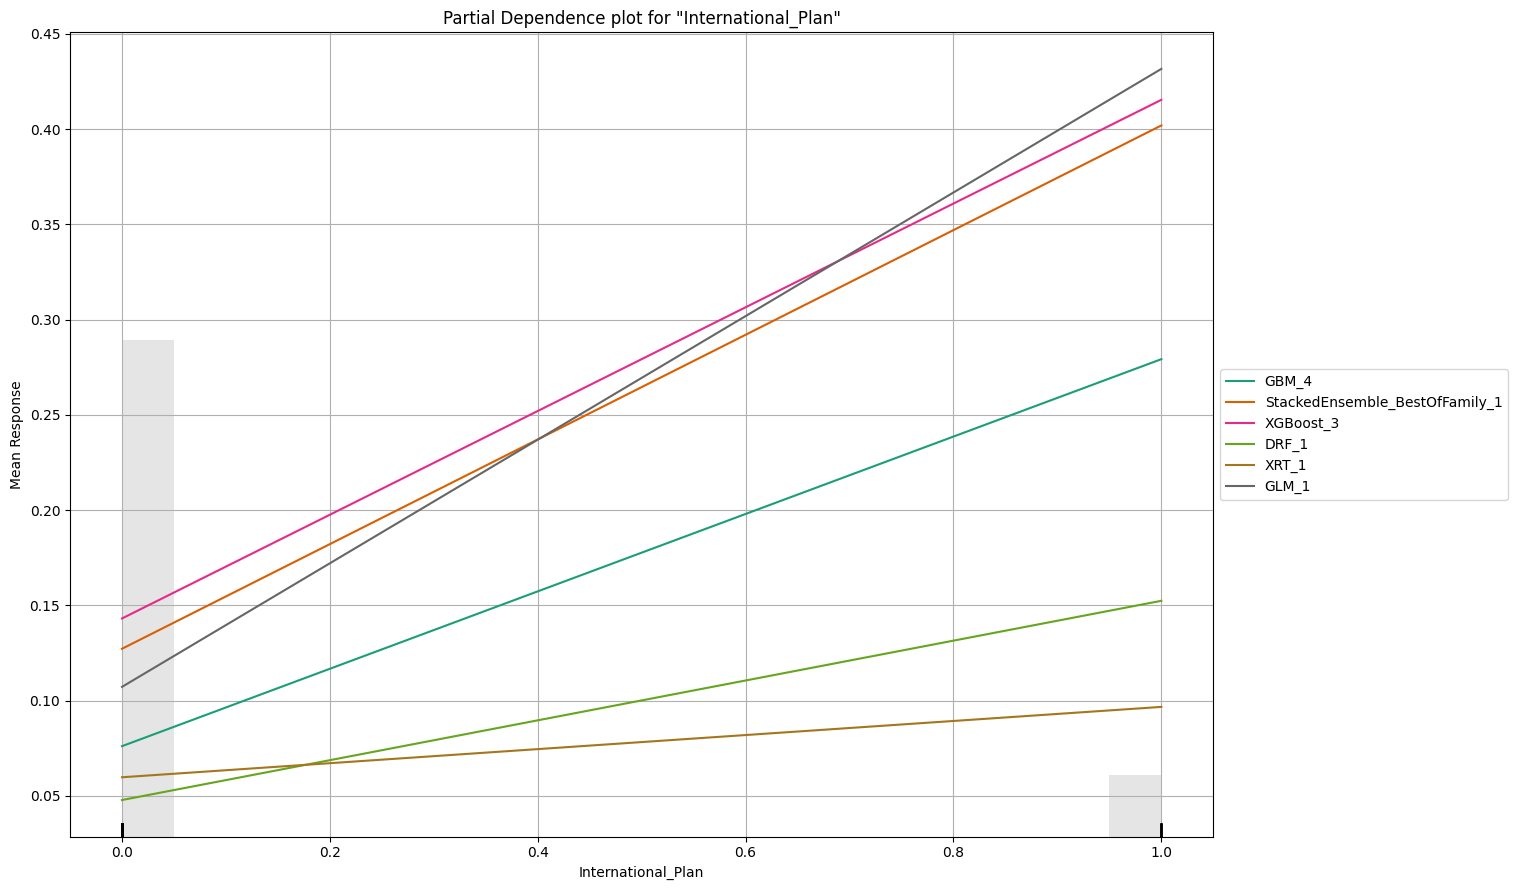

In [36]:
top_var = 'Total_Day_Mins'
pd_plot = aml.pd_multi_plot(test, top_var)

top_var = 'Customer_Service_Calls'
pd_plot = aml.pd_multi_plot(test, top_var)

top_var = 'International_Plan'
pd_plot = aml.pd_multi_plot(test, top_var)



- The plot includes multiple models: Gradient Boosting Machine (GBM), Stacked Ensemble, XGBoost, Distributed Random Forest (DRF), Extremely Randomized Trees (XRT), and Generalized Linear Model (GLM).
1. Total Day Mins
- All models exhibit an increasing trend, suggesting that as "Total_Day_Mins" increases, the likelihood of the predicted outcome also increases.
- In the context of churn prediction, this could mean that higher daily usage (measured in minutes) is associated with increased churn probability.

2. Customer Service Calls
- The line for GBM (Gradient Boosting Machine) shows a sharp increase in the mean response when customer service calls go beyond 3, suggesting that according to this model, more than 3 calls significantly increase the predicted outcome (possibly the likelihood of churn, if this is a churn prediction model).
- The StackedEnsemble model shows a similar, but slightly less steep, relationship.
- The XGBoost model also indicates an increasing trend but with a more gradual slope.
- The DRF (Distributed Random Forest), XRT (eXtreme Random Trees), and GLM (Generalized Linear Model) lines show relatively flat responses, suggesting that these models do not find "Customer_Service_Calls" to be as strongly predictive of the outcome.

3. International Plan
- The lines for GBM and StackedEnsemble models show a clear positive slope, which means these models predict an increase in the mean response when the international plan is active.
- The XGBoost model shows a more moderate slope, suggesting a less pronounced but still positive impact of the international plan on the mean response.
- The lines for DRF, XRT, and GLM show a much flatter slope, indicating these models predict little to no change in the mean response based on whether or not there is an international plan.

# Shap Analysis

SHAP (SHapley Additive exPlanations) analysis is a technique to explain individual predictions based on the contribution of each feature to the prediction.

In [37]:
pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 6.9 MB/s eta 0:00:00


In [38]:
# Example for a GBM model
from h2o.estimators import H2OGradientBoostingEstimator

# Ensure your model training code is using a tree-based model
model = H2OGradientBoostingEstimator()
model.train(x=predictors, y=target, training_frame=train)


gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1708402402527_2039


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          16013                  5            5            5             6             28            20.78

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.020886350086738923
RMSE: 0.1445211060251717
LogLoss: 0.09469649121035036
Mean Per-Class Error: 0.06385398766092909
AUC: 0.9865780911062907
AUCPR: 0.9600195297656627
Gini: 0.9731561822125814

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3701216827908315
       0     1    Error    Rate
-----  ----  ---  -------  -------------
0      1842  2    0.0011   (2.0/1844.0)
1      39    269  0.1266   (39.0/308.0)
Total  1881  271  0.0191   (41.0/2152.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.370122     0.929188  150
max f2                       0.0955201    0.898148  226
max f0point5                 0.370122     0.966236  150
max accuracy                 0.370122     0.980948  150
max precision                0.991828     1         0
max recall                   0.0204356    1         353
max specificity              0.991828     1         0
max absolute_mcc             0.370122     0.920744  150
max min_per_class_accuracy   0.0955201    0.944805  226
max mean_per_class_accuracy  0.0955201    0.946101  226
max tns                      0.991828     1844      0
max fns                      0.991828     306       0
max fps                      0.00432158   1844      399
max tps                      0.0204356    308       353
max tnr                      0.991828     1         0
max fnr                      0.991828     0.993506  0
max fpr                      0.00432158   1         399
max tpr                      0.0204356    1         353

Gains/Lift Table: Avg response rate: 14.31 %, avg score: 14.34 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.010223                    0.973239           6.98701    6.98701            1                0.982707   1                           0.982707            0.0714286       0.0714286                  598.701   598.701            0.0714286
2        0.0204461                   0.967054           6.98701    6.98701            1                0.969703   1                           0.976205            0.0714286       0.142857                   598.701   598.701            0.142857
3        0.0302045                   0.962544           6.98701    6.98701            1                0.965174   1                           0.972641            0.0681818       0.211039                   598.701   598.701            0.211039
4        0.0404275                   0.957418           6.98701    6.98701            1                0.959607   1                           0.969345            0.0714286       0.282468                   598.701   598.701            0.282468
5        0.0501859                   0.948756           6.98701    6.98701            1                0.953325   1                           0.9662

Predict_contributions function in H2O is used to calculate these values for a given model and dataset

In [39]:
shap_values = model.predict_contributions(test)


contributions progress: |████████████████████████████████████████████████████████| (done) 100%


contributions progress: |████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


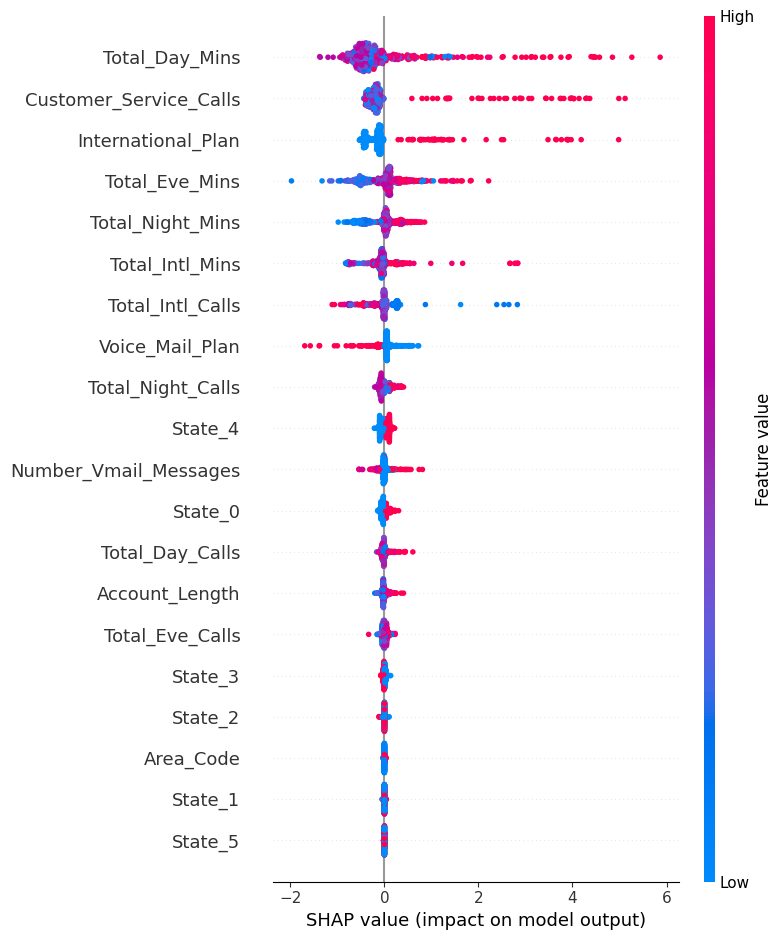

In [58]:
import shap
# Assuming 'model' is your trained H2O model and 'test' is your H2OFrame containing test data
shap_values = model.predict_contributions(test)

# Convert the H2OFrame of SHAP values to a pandas DataFrame
shap_values_df = h2o.as_list(shap_values)

# Now you can proceed to prepare your SHAP values matrix
shap_values_matrix = shap_values_df.iloc[:, :-1].to_numpy()

# Ensure that 'test[predictors].as_data_frame()' correctly represents the feature matrix corresponding to SHAP values
feature_matrix = test[predictors].as_data_frame()

# You can now create your SHAP summary plot
plt.figure(figsize=(30, 15))
shap.summary_plot(shap_values_matrix, features=feature_matrix, feature_names=predictors)

Total_Day_Mins: This is the most impactful feature on the model output. Higher values (indicated by the pink/red color) seem to have a significant positive impact on the model's prediction. The spread of the SHAP values also suggests a variable impact across the data points.

Customer_Service_Calls: This feature has a large spread of SHAP values, indicating variable impacts across the data points. Higher values appear to increase the model's output.

International_Plan: Like Customer_Service_Calls, this feature has a wide distribution of SHAP values. It seems to have a mix of positive and negative impacts depending on the sample, with higher values mostly leading to an increase in the model's output.

Total_Eve_Mins, Total_Night_Mins, Total_Intl_Mins: These features have a moderate impact on the model output with SHAP values distributed around zero, suggesting that they have a balanced effect across the dataset.

Total_Intl_Calls, Voice_Mail_Plan, Total_Night_Calls: These features have SHAP values clustered closer to zero, indicating a smaller impact on the model's output.

State Variables: The states appear at various levels of importance in the model. Some states like State_4 seem to have a more significant and mostly positive impact, whereas others like State_0 have a minimal impact.

Other Features: Features like Account_Length and Area_Code have a very small impact on the model's output, as indicated by the SHAP values clustered around zero.

# Learning Curve Plot

The learning curve plot shows error metric dependence on learning progress (e.g. RMSE vs. number of trees trained so far in GBM). This plot can help to diagnose whether the model is overfitting or underfitting – in an ideal situation, the training and validation curves converge. There can be up to 4 curves showing the error, and all available metrics will be plotted:


> Training
Validation (available when validation_frame is set)

> Validation (available when validation_frame is set)


> Training on CV Models (available when nfolds>1)


> Cross-validation (available when nfolds>1)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


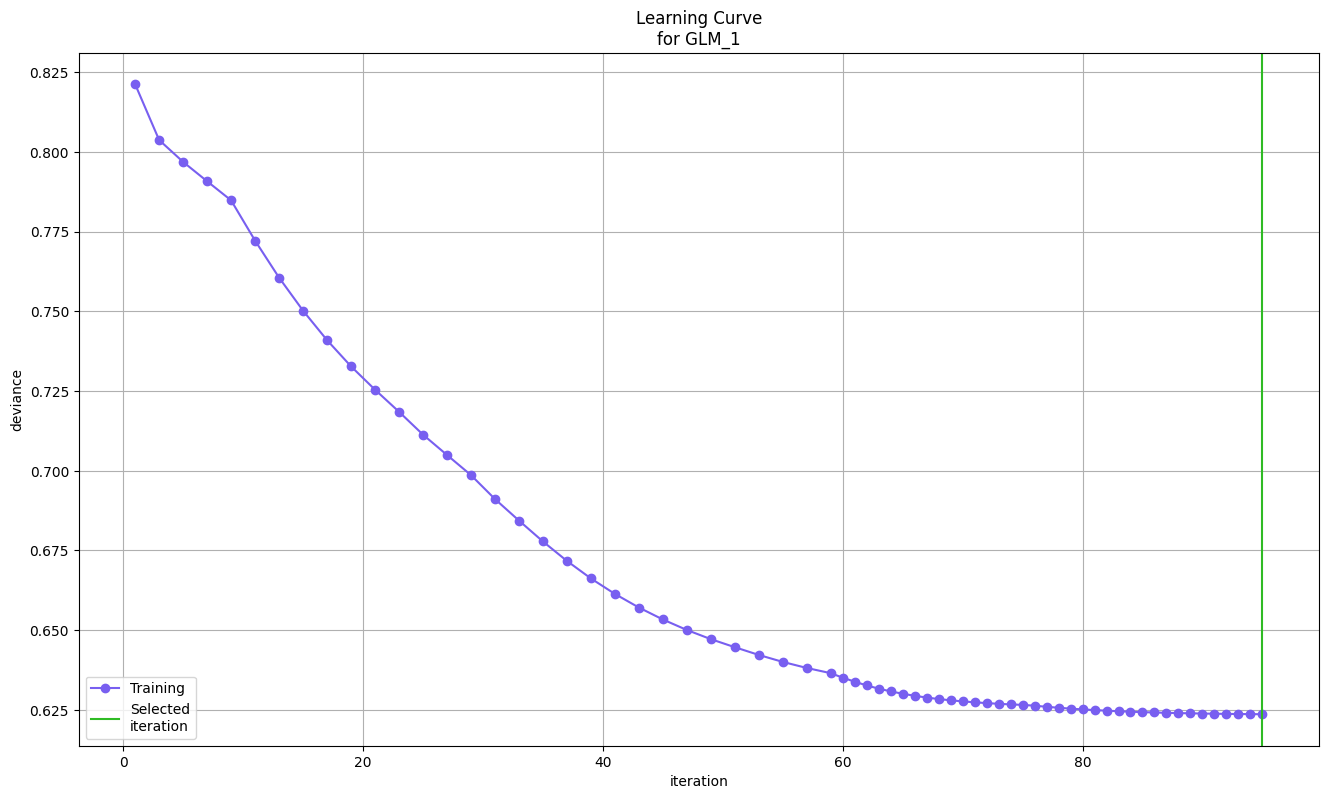

In [63]:
from h2o.estimators import H2OGeneralizedLinearEstimator

glm_model = H2OGeneralizedLinearEstimator(model_id='GLM_1', lambda_search=True)
glm_model.train(x=predictors, y=target, training_frame=train)
glm_model.learning_curve_plot()

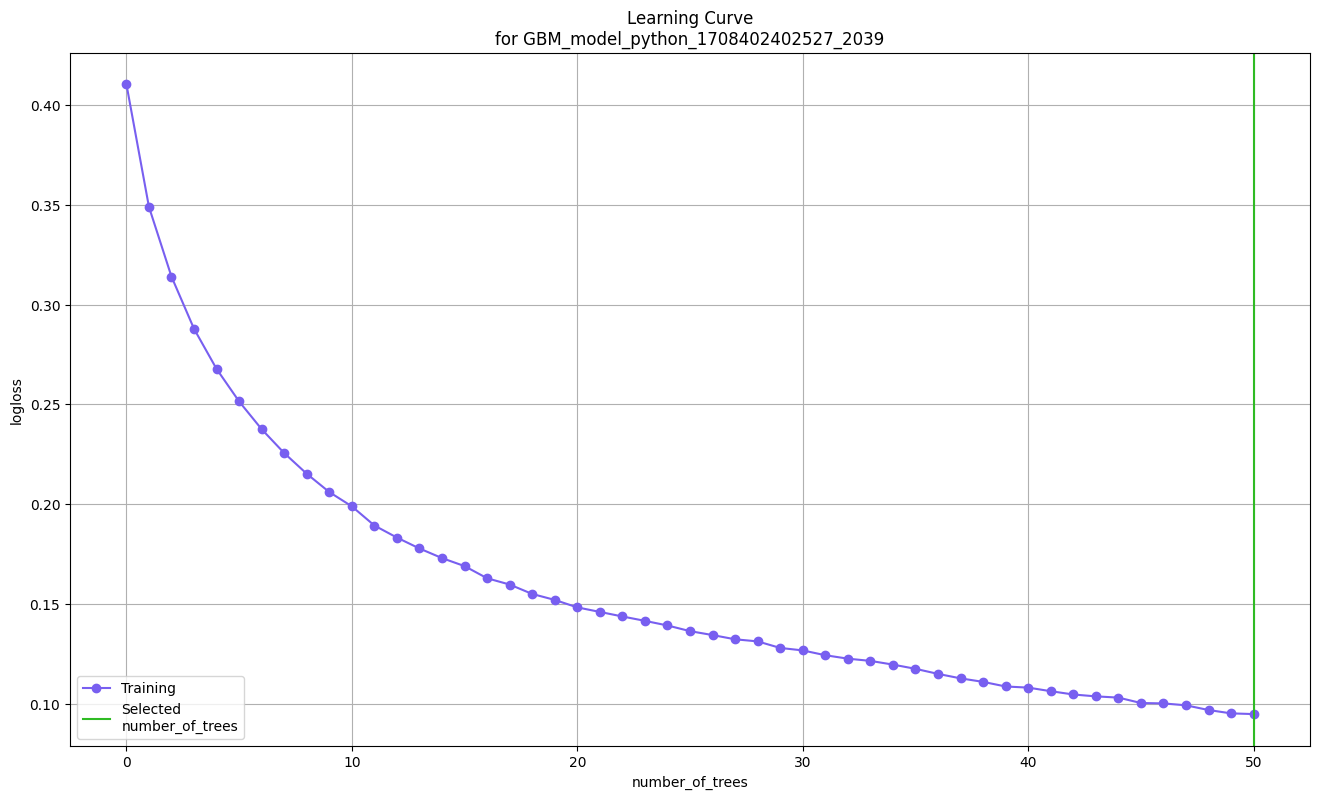

In [61]:
learning_curve_plot = model.learning_curve_plot()

This learning curve suggests that the model is improving its fit to the data up until the point marked by the green line, where it reaches an optimum. The unusual spikes in CV deviance at later iterations are a point of concern and might need further investigation. It could be a sign that the model is starting to overfit the training data, not generalize well to the CV data, or that there are some data or model-specific issues that need to be addressed.






# Regularization

In [44]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

# Lasso (L1) Regularization
lasso_model = H2OGeneralizedLinearEstimator(alpha=1, lambda_search=True)
lasso_model.train(x=predictors, y=target, training_frame=train)

# Print the model coefficients
print("Lasso Coefficients: \n", lasso_model.coef())


glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Lasso Coefficients: 
 {'Intercept': -8.368289155074942, 'Account_Length': 0.0015386286789850472, 'Area_Code': -0.0004078749448058787, 'International_Plan': 2.2970776286990824, 'Voice_Mail_Plan': -2.174690122577999, 'Number_Vmail_Messages': 0.04003759485715681, 'Total_Day_Mins': 0.012625457430558193, 'Total_Day_Calls': 0.0017607857634712872, 'Total_Eve_Mins': 0.006476763749944686, 'Total_Eve_Calls': 0.0, 'Total_Night_Mins': 0.0022807934754666154, 'Total_Night_Calls': 0.0035300391911509046, 'Total_Intl_Mins': 0.09648695268090167, 'Total_Intl_Calls': -0.12887308187688137, 'Customer_Service_Calls': 0.49175713946236466, 'State_0': 0.39187078121135904, 'State_1': -0.16890732407067002, 'State_2': 0.03120008244668657, 'State_3': -0.04434766872152779, 'State_4': 0.3349844379950399, 'State_5': 0.15847916186328162}


In [45]:
from h2o.estimators import H2OGeneralizedLinearEstimator
lasso_model = H2OGeneralizedLinearEstimator(family="binomial", alpha=1, lambda_search=True)
lasso_model.train(x=predictors, y=target, training_frame=train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708402402527_2093


GLM Model: summary
    family    link    regularization              lambda_search                                                                  number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  --------------------------  -----------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Lasso (lambda = 3.295E-4 )  nlambda = 100, lambda.max = 0.09604, lambda.min = 3.295E-4, lambda.1se = -1.0  20                            19                             89                      py_4_sid_9108

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.09400751056112416
RMSE: 0.3066064424651318
LogLoss: 0.31180338749927766
AUC: 0.832368756514635
AUCPR: 0.49996579196789154
Gini: 0.6647375130292701
Null degrees of freedom: 2151
Residual degrees of freedom: 2132
Null deviance: 1767.1871205028372
Residual deviance: 1342.0017797968908
AIC: 1382.0017797968908

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2503519439270829
       0     1    Error    Rate
-----  ----  ---  -------  --------------
0      1648  196  0.1063   (196.0/1844.0)
1      130   178  0.4221   (130.0/308.0)
Total  1778  374  0.1515   (326.0/2152.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.250352     0.521994  180
max f2                       0.144429     0.622374  246
max f0point5                 0.29494      0.515823  158
max accuracy                 0.504892     0.873606  79
max precision                0.990755     1         0
max recall                   0.00571001   1         395
max specificity              0.990755     1         0
max absolute_mcc             0.29337      0.439728  159
max min_per_class_accuracy   0.145801     0.766234  245
max mean_per_class_accuracy  0.147834     0.766797  244
max tns                      0.990755     1844      0
max fns                      0.990755     307       0
max fps                      0.00129959   1844      399
max tps                      0.00571001   308       395
max tnr                      0.990755     1         0
max fnr                      0.990755     0.996753  0
max fpr                      0.00129959   1         399
max tpr                      0.00571001   1         395

Gains/Lift Table: Avg response rate: 14.31 %, avg score: 14.31 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.010223                    0.780758           5.71665    5.71665            0.818182         0.858326   0.818182                    0.858326            0.0584416       0.0584416                  471.665   471.665            0.0562724
2        0.0204461                   0.685768           4.44628    5.08146            0.636364         0.737137   0.727273                    0.797732            0.0454545       0.103896                   344.628   408.146            0.0973885
3        0.0302045                   0.628518           4.65801    4.94466            0.666667         0.653067   0.707692                    0.750994            0.0454545       0.149351                   365.801   394.466            0.139047
4        0.0404275            

In [46]:
# Ridge (L2) Regularization
ridge_model = H2OGeneralizedLinearEstimator(alpha=0, lambda_search=True)
ridge_model.train(x=predictors, y=target, training_frame=train)

# Print the model coefficients
print("Ridge Coefficients: \n", ridge_model.coef())


glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Ridge Coefficients: 
 {'Intercept': -8.487280162769027, 'Account_Length': 0.0016345145816374234, 'Area_Code': -0.0004913550332552919, 'International_Plan': 2.3112543804213694, 'Voice_Mail_Plan': -2.5054790207846818, 'Number_Vmail_Messages': 0.05016539933632378, 'Total_Day_Mins': 0.012737415200156709, 'Total_Day_Calls': 0.0019847289078354802, 'Total_Eve_Mins': 0.006621935017019637, 'Total_Eve_Calls': -1.879819928510912e-05, 'Total_Night_Mins': 0.0023993606149836674, 'Total_Night_Calls': 0.0037996215714059395, 'Total_Intl_Mins': 0.09797218723946992, 'Total_Intl_Calls': -0.13154347701852026, 'Customer_Service_Calls': 0.4961910198678649, 'State_0': 0.3970875338396772, 'State_1': -0.17621615222316045, 'State_2': 0.04125873217658001, 'State_3': -0.05301270462785509, 'State_4': 0.33874759905534896, 'State_5': 0.16755505908710072}


In [64]:
ridge_model = H2OGeneralizedLinearEstimator(family="binomial", alpha=0, lambda_search=True)
ridge_model.train(x=predictors, y=target, training_frame=train)


glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708402402527_4137


GLM Model: summary
    family    link    regularization              lambda_search                                                               number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  --------------------------  --------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Ridge ( lambda = 2.49E-5 )  nlambda = 30, lambda.max = 9.6037, lambda.min = 2.49E-5, lambda.1se = -1.0  20                            20                             48                      py_4_sid_9108

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.09397131608047468
RMSE: 0.3065474124511161
LogLoss: 0.3117359157682221
AUC: 0.8326178972870947
AUCPR: 0.49904617627036923
Gini: 0.6652357945741894
Null degrees of freedom: 2151
Residual degrees of freedom: 2131
Null deviance: 1767.1871205028372
Residual deviance: 1341.711381466428
AIC: 1383.711381466428

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2490870826670401
       0     1    Error    Rate
-----  ----  ---  -------  --------------
0      1647  197  0.1068   (197.0/1844.0)
1      128   180  0.4156   (128.0/308.0)
Total  1775  377  0.151    (325.0/2152.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.249087     0.525547  178
max f2                       0.140465     0.623695  242
max f0point5                 0.326247     0.516152  144
max accuracy                 0.491677     0.875     84
max precision                0.991468     1         0
max recall                   0.00493235   1         396
max specificity              0.991468     1         0
max absolute_mcc             0.249087     0.439982  178
max min_per_class_accuracy   0.14492      0.766234  239
max mean_per_class_accuracy  0.143408     0.767332  240
max tns                      0.991468     1844      0
max fns                      0.991468     307       0
max fps                      0.00162708   1844      399
max tps                      0.00493235   308       396
max tnr                      0.991468     1         0
max fnr                      0.991468     0.996753  0
max fpr                      0.00162708   1         399
max tpr                      0.00493235   1         396

Gains/Lift Table: Avg response rate: 14.31 %, avg score: 14.31 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.010223                    0.786283           5.71665    5.71665            0.818182         0.861956    0.818182                    0.861956            0.0584416       0.0584416                  471.665   471.665            0.0562724
2        0.0204461                   0.693979           4.44628    5.08146            0.636364         0.741952    0.727273                    0.801954            0.0454545       0.103896                   344.628   408.146            0.0973885
3        0.0302045                   0.634639           4.65801    4.94466            0.666667         0.657316    0.707692                    0.755225            0.0454545       0.149351                   365.801   394.466            0.139047
4        0.0404275                  

In [65]:
lasso_perf = lasso_model.model_performance(test_data=test)
ridge_perf = ridge_model.model_performance(test_data=test)

# Print metrics for Lasso
print("Lasso MSE: ", lasso_perf.mse())
print("Lasso RMSE: ", lasso_perf.rmse())
print("Lasso LogLoss: ", lasso_perf.logloss())
print("Lasso AUC: ", lasso_perf.auc())
print("Lasso Gini: ", 2*lasso_perf.auc() - 1)

# Print metrics for Ridge
print("Ridge MSE: ", ridge_perf.mse())
print("Ridge RMSE: ", ridge_perf.rmse())
print("Ridge LogLoss: ", ridge_perf.logloss())
print("Ridge AUC: ", ridge_perf.auc())
print("Ridge Gini: ", 2*ridge_perf.auc() - 1)

Lasso MSE:  0.11136425942884397
Lasso RMSE:  0.3337128397722269
Lasso LogLoss:  0.36831983807975377
Lasso AUC:  0.7767281105990784
Lasso Gini:  0.5534562211981569
Ridge MSE:  0.11144100304689356
Ridge RMSE:  0.3338278044844281
Ridge LogLoss:  0.3695205624961613
Ridge AUC:  0.7751872119815668
Ridge Gini:  0.5503744239631336


GBM Model (without regularization):

MSE: 0.020886350086738923
RMSE: 0.1445211060251717
LogLoss: 0.09469649121035036
AUC: 0.9865780911062907
Gini: 0.9731561822125814
Lasso Model (with regularization):

MSE: 0.11136425942884397
RMSE: 0.3337128397722269
LogLoss: 0.36831983807975377
AUC: 0.7767281105990784
Gini: 0.5534562211981569
Ridge Model (with regularization):

MSE: 0.11144100304689356
RMSE: 0.3338278044844281
LogLoss: 0.3695205624961613
AUC: 0.7751872119815668
Gini: 0.5503744239631336

- The GBM model without regularization is performing significantly better across all metrics.
- It has the lowest MSE and RMSE, indicating better fit to the data with fewer errors.
- The LogLoss is also lower, which is better for classification models. Moreover, the AUC and Gini coefficient are much higher for the GBM model, showing that it has a much better discriminative ability to separate the positive and negative classes.

In summary, the GBM model without regularization is outperforming the regularized Lasso and Ridge models. It is important to note, however, that these metrics should be taken in context. A model with very low error on the training set but high error on a validation or test set might be overfitting. It's essential to evaluate these models on a separate validation or test set to ensure that they generalize well to unseen data.

# Hyperparamter Tuning Analysis

Hyperparameter tuning is the process of selecting the set of optimal hyperparameters for a learning algorithm. The aim is to find the combination of hyperparameters that yields a model with the best performance metrics on a given dataset.

For an H2O GBM model, some of the hyperparameters that are typically tuned include:

- Number of Trees: The number of trees in the forest. More trees can lead to better performance but can also increase the risk of overfitting.
Max Depth: The maximum depth of the trees. Deeper trees can model more complex relationships but can overfit.
- Learning Rate: Sometimes referred to as shrinkage, this parameter controls the contribution of each tree in the ensemble. Smaller rates require more trees but can lead to better generalization.
- Sample Rate: The fraction of the training data used for growing trees. Using a subset can lead to more diverse trees.
Col Sample Rate: The fraction of features used for training each tree. Again, using a subset can improve generalization by adding diversity to the trees.


In [93]:
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators.gbm import H2OGradientBoostingEstimator

# Define the hyperparameter grid
hyper_params = {'learn_rate': [0.01, 0.1],
                'max_depth': [3, 5, 9],
                'sample_rate': [0.8, 1.0],
                'col_sample_rate': [0.2, 0.5, 1.0]}

# Set up H2OGridSearch
grid = H2OGridSearch(model=H2OGradientBoostingEstimator,
                     grid_id='gbm_grid',
                     hyper_params=hyper_params)

# Train the grid
grid.train(x=predictors, y=target, training_frame=train, validation_frame=test)

# Review the grid results
print(grid.sorted_metric_table())


gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
      col_sample_rate  learn_rate  max_depth  sample_rate          model_ids  \
0                 1.0        0.10        5.0          0.8  gbm_grid_model_12   
1                 1.0        0.10        5.0          1.0  gbm_grid_model_30   
2                 0.5        0.10        5.0          1.0  gbm_grid_model_29   
3                 0.5        0.10        5.0          0.8  gbm_grid_model_11   
4                 0.5        0.10        9.0          1.0  gbm_grid_model_35   
5                 1.0        0.10        9.0          1.0  gbm_grid_model_36   
6                 0.5        0.10        9.0          0.8  gbm_grid_model_17   
7                 1.0        0.10        3.0          1.0  gbm_grid_model_24   
8                 1.0        0.10        9.0          0.8  gbm_grid_model_18   
9                 1.0        0.10        3.0          0.8   gbm_grid_model_6   
10                0.2    

References:

https://docs.h2o.ai/h2o/latest-stable/h2o-docs/explain.html
https://openai.com/gpt-4
https://medium.com/dataman-in-ai/the-shap-values-with-h2o-models-773a203b75e3
https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets
https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/AutoML_Wine_Quality.ipynb
https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/AutoML_Smoke_Detection_Example.ipynb

License:

MIT License

Copyright (c) 2024 anumohan22

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.